In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as pyplot
import seaborn as sb

In [6]:
def DateTimeParse(date):
    parsed  =datetime.strptime(date, '%Y-%m-%d %H:%M:%S');
    year = parsed.year;
    month = parsed.month;
    day = parsed.day;
    hours = parsed.hour;
    minutes = parsed.minute;
    seconds = parsed.second;
    return pd.Series(data =[year,month,day,hours,minutes,seconds],index = ['year', 'month', 'day','hour', 'minute', 'second']);

In [7]:
from math import sin, cos, sqrt, atan2, radians

def get_distance(lon_1, lon_2, lat_1, lat_2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat_1)
    lon1 = radians(lon_1)
    lat2 = radians(lat_2)
    lon2 = radians(lon_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [8]:
import requests

from tqdm.auto import tqdm

tqdm.pandas()

Prepare Data

In [9]:
df = pd.read_csv('train.csv');

In [10]:
res = df['pickup_datetime'].progress_apply(lambda x: DateTimeParse(x))

  0%|          | 0/1458644 [00:00<?, ?it/s]

In [11]:
res.head()

,year,month,day,hour,minute,second
0,2016,3,14,17,24,55
1,2016,6,12,0,43,35
2,2016,1,19,11,35,24
3,2016,4,6,19,32,31
4,2016,3,26,13,30,55


In [13]:
df[['year', 'month', 'day','hour', 'minute', 'second']] = pd.DataFrame(np.array(res),index=df.index,columns = ['year', 'month', 'day','hour', 'minute', 'second']);

In [14]:
df['distance'] = df.progress_apply(lambda x: get_distance(x['pickup_longitude'],x['dropoff_longitude'],x['pickup_latitude'],x['dropoff_latitude']),axis=1)

  0%|          | 0/1458644 [00:00<?, ?it/s]

In [15]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,minute,second,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,17,24,55,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,0,43,35,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,11,35,24,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,19,32,31,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,13,30,55,1.188962


In [16]:
df.to_csv(r'.\train_fixed.csv',index = False)

In [97]:
df = pd.read_csv('train_fixed.csv');

Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  year                1458644 non-null  int64  
 12  month               1458644 non-null  int64  
 13  day                 1458644 non-null  int64  
 14  hour                1458644 non-null  int64  
 15  minute         

In [18]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,minute,second,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,17,24,55,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,0,43,35,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,11,35,24,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,19,32,31,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,13,30,55,1.188962


In [5]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,year,month,day,hour,minute,second,distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,2016.0,3.516818e+00,1.550402e+01,1.360648e+01,2.959016e+01,2.947359e+01,3.441944e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,0.0,1.681038e+00,8.703135e+00,6.399693e+00,1.732471e+01,1.731985e+01,4.297887e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.400000e+01,1.232223e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01,2.900000e+01,2.094374e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01,4.400000e+01,3.876554e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,2016.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01,1.241298e+03


In [20]:
print("Unique years in dataset: {}".format(df["year"].unique()))

Unique years in dataset: [2016]


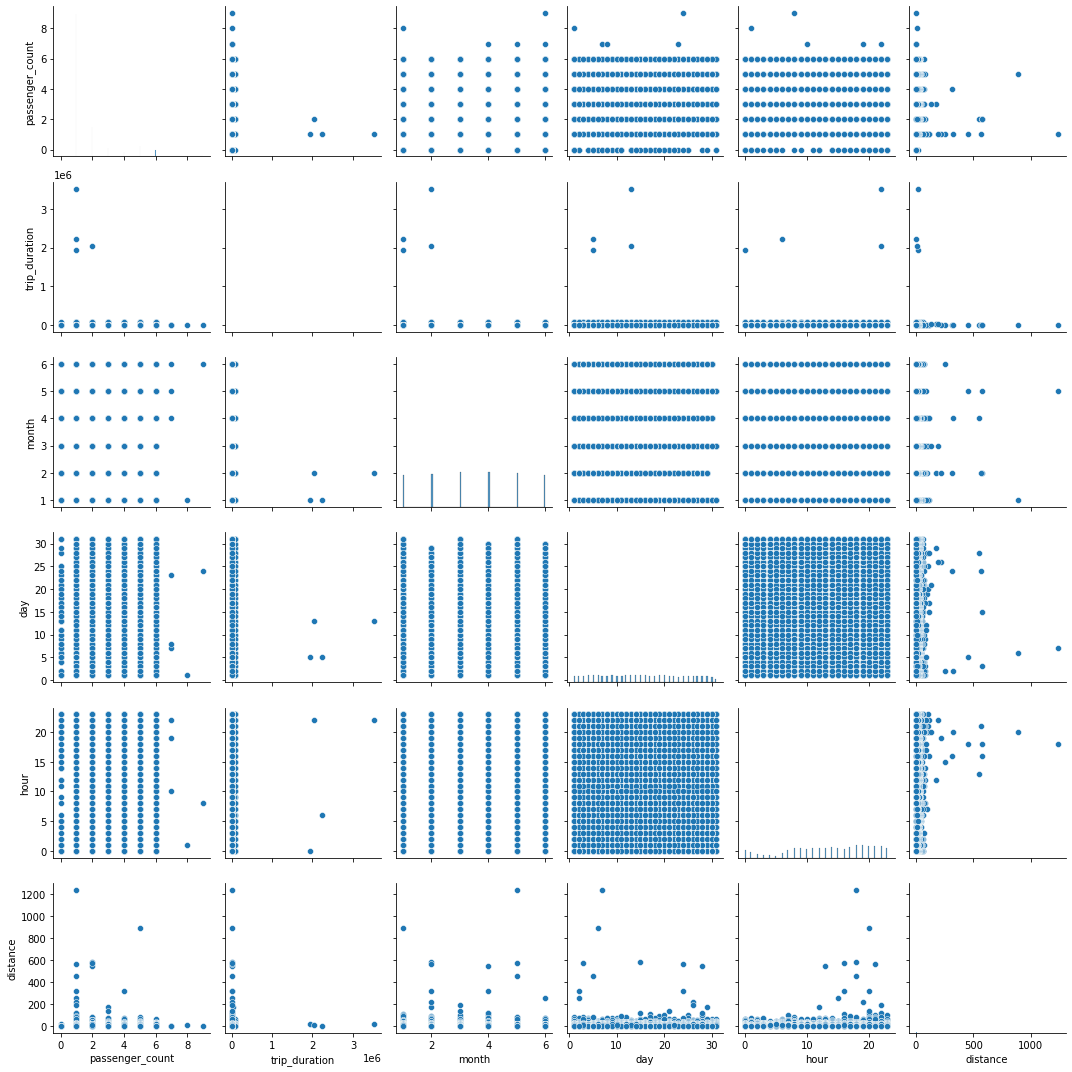

In [26]:
columns = ['passenger_count','trip_duration', 'month', 'day','hour','distance']

sb.pairplot(df[columns]);
pyplot.tight_layout();
pyplot.show()

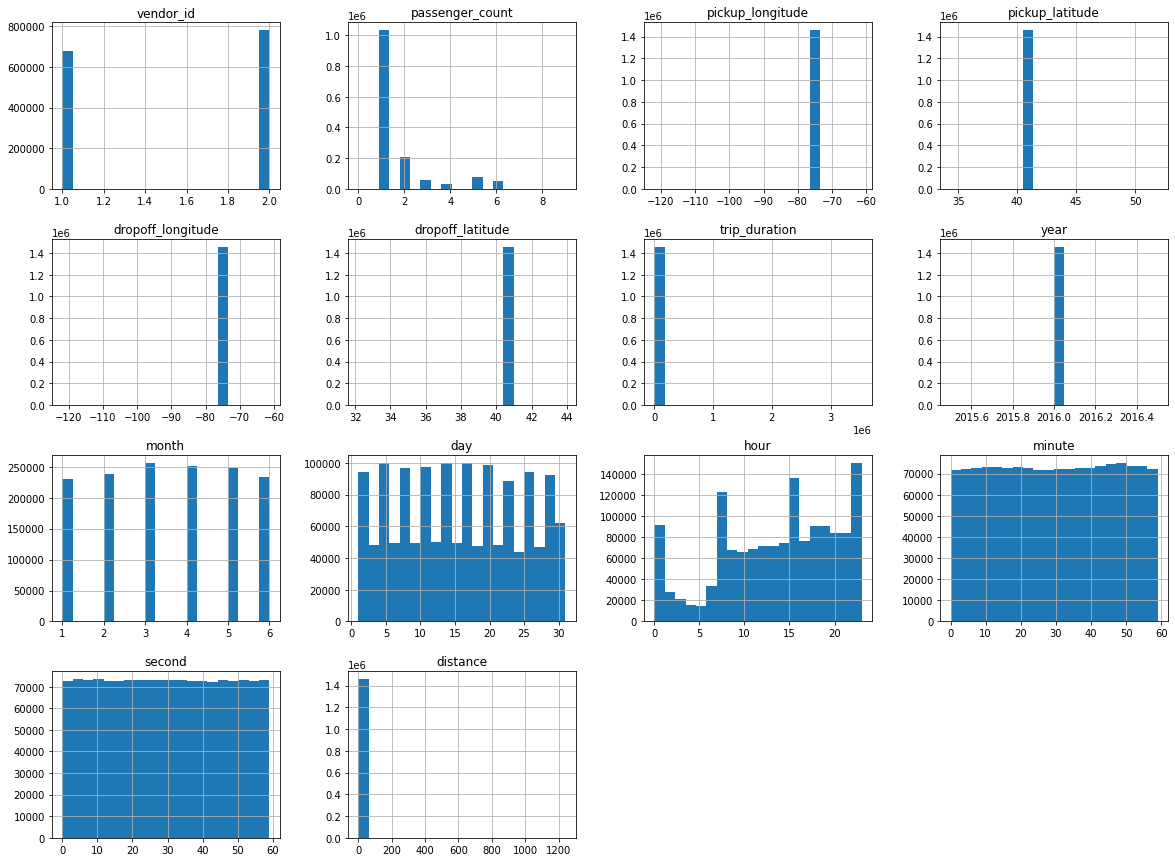

In [27]:
df.hist(bins = 20,figsize = (20,15))
pyplot.show()

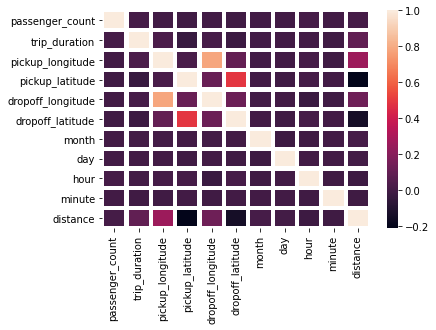

In [3]:
columns = ['passenger_count','trip_duration','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude', 'month', 'day','hour', 'minute','distance']
cm = df[columns].corr()

hm = sb.heatmap(data =cm,cbar = True,annot = False,square = False,xticklabels =columns,yticklabels = columns,linewidths = 3.2)

pyplot.show()


In [4]:
corr_matrix = df.corr()
corr_matrix['trip_duration'].sort_values(ascending = False)

trip_duration        1.000000
distance             0.094777
pickup_longitude     0.026542
vendor_id            0.020304
dropoff_longitude    0.014678
passenger_count      0.008471
month                0.006607
hour                 0.003690
day                  0.000566
second               0.000044
minute              -0.002338
dropoff_latitude    -0.020677
pickup_latitude     -0.029204
year                      NaN
Name: trip_duration, dtype: float64

Filter Data

In [98]:
min_trip_duration = 60*2; # дві хвилини
max_trip_duration = 60*60 #одна година
#df_filtered =df[(df['trip_duration'] <= max_trip_duration ) &  (df['trip_duration'] >= min_trip_duration)];
#df_filtered =df_filtered[(df_filtered['distance'] != 0) & (df_filtered['distance'] <400)]
df_filtered =df;

In [129]:
df_filtered.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,year,month,day,hour,minute,second,distance
count,1.414558e+06,1.414558e+06,1.414558e+06,1.414558e+06,1.414558e+06,1.414558e+06,1.414558e+06,1414558.0,1.414558e+06,1.414558e+06,1.414558e+06,1.414558e+06,1.414558e+06,1.414558e+06
mean,1.534265e+00,1.665040e+00,-7.397435e+01,4.075123e+01,-7.397389e+01,4.075199e+01,8.265071e+02,2016.0,3.513965e+00,1.550276e+01,1.362523e+01,2.959310e+01,2.947434e+01,3.401210e+00
std,4.988247e-01,1.314046e+00,6.815541e-02,2.859687e-02,6.727418e-02,3.335853e-02,5.814612e+02,0.0,1.680378e+00,8.706439e+00,6.403227e+00,1.732067e+01,1.732190e+01,3.763108e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.471223e+01,-1.219333e+02,3.218114e+01,1.200000e+02,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.243081e-04
25%,1.000000e+00,1.000000e+00,-7.399194e+01,4.073755e+01,-7.399135e+01,4.073603e+01,4.090000e+02,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.400000e+01,1.274827e+00
50%,2.000000e+00,1.000000e+00,-7.398187e+01,4.075414e+01,-7.397984e+01,4.075454e+01,6.690000e+02,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01,2.900000e+01,2.127159e+00
75%,2.000000e+00,2.000000e+00,-7.396782e+01,4.076831e+01,-7.396332e+01,4.076975e+01,1.072000e+03,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01,4.400000e+01,3.881161e+00
max,2.000000e+00,6.000000e+00,-6.697216e+01,4.437194e+01,-6.904802e+01,4.314758e+01,3.600000e+03,2016.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01,3.202263e+02


In [99]:
#X = df_filtered[['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','month','day','hour', 'distance','store_and_fwd_flag']];
X = df_filtered[['passenger_count','month','day','hour', 'distance','store_and_fwd_flag']];

In [100]:
y =df_filtered['trip_duration'];

In [101]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
X['store_and_fwd_flag'] = enc.fit_transform(X['store_and_fwd_flag'])

<ipython-input-101-c8d3faa70088>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['store_and_fwd_flag'] = enc.fit_transform(X['store_and_fwd_flag'])


Sklearn Training

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=42)

In [63]:
polinomial_degree = 2;

In [64]:
polynomial_features = PolynomialFeatures(degree=polinomial_degree,
                                         include_bias=False);
linear_regression = LinearRegression(normalize=True);

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression(normalize=True))])

Accuracy

In [65]:
predicted = pipeline.predict(X_test);

In [66]:
print("Mean absolute error: ",mean_absolute_error(y_test.values,predicted))
print("Mean squared error: ",mean_squared_error(y_test.values,predicted))
print("Root mean squared error: ",mean_squared_error(y_test.values,predicted,squared=False))

Mean absolute error:  431.3532903602806
Mean squared error:  9468166.55166171
Root mean squared error:  3077.038600937874


In [67]:
delta = abs(y_test.values -predicted)

In [68]:
max_val = -101
index =0
for i in range(y_test.shape[0]):
    if(delta[i] > max_val):
        max_val= delta[i];
        index = i;

print("max_val index: ",index)
print("max_val: ",max_val)

max_val index:  426462
max_val:  86017.95873874455


In [69]:
X_test.iloc[index]

passenger_count       1.0
month                 6.0
day                   5.0
hour                  1.0
distance              0.0
store_and_fwd_flag    0.0
Name: 168983, dtype: float64

In [70]:
print("Predicted: ",predicted[index],"  From dataset: ",y_test.iloc[index])

Predicted:  334.0412612554558   From dataset:  86352


Custom Train model

In [71]:
def normalize(X):
    mean = np.mean(X,axis =0)
    std = np.std(X,axis =0)
    X_new = (X-mean)/std
    #X_new = X
    return X_new, mean, std

In [72]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [73]:
def hypothesis(X, theta):
    h_thetha = X.dot(theta);
    return h_thetha

In [74]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X,theta) - y)**2)/(2*m);
    return J

In [75]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_thetha =np.array(    ((hypothesis(X,theta)-y).dot(X))/m    )
    return d_thetha

In [76]:
def gradient_descent(X, y, theta, alpha, max_num_iters,eps, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    current_iteration = 0;
    if print_J == True:
        print(J)
    J_history.append(J)

    while(True):
        delta =derivative(X, y, theta)*alpha;
        theta = theta - delta;
        J = cost_function(X, y, theta);
        if print_J == True:
            print(J);
        J_history.append(J)
        current_iteration+=1;
        if(abs(J_history[-1] - J_history[-2]) < eps or current_iteration >max_num_iters): 
            break;# досягли заданої точності чи кількості ітерацій
    return theta, J_history

In [77]:
def Predict(X,mean,std,theta):
    X =(X-mean)/std;
    X = prepare_X(X)
    predicted =hypothesis(X,theta);
    return predicted
    

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=42)

In [112]:
X_train_norm, mean, std = normalize(X_train)
print(mean);
print(std)
X_train = prepare_X(X_train_norm)
theta = np.array([0,0,0,0,0,0,0])

passenger_count        1.663098
month                  3.517820
day                   15.517420
hour                  13.603450
distance               3.445861
store_and_fwd_flag     0.005499
dtype: float64
passenger_count       1.312685
month                 1.681177
day                   8.704435
hour                  6.403066
distance              4.303208
store_and_fwd_flag    0.073954
dtype: float64


In [113]:
print('X: {}'.format(X_train.shape))
print('y: {}'.format(y_train.shape))
print(cost_function(X_train, y_train, theta))

X: (875186, 7)
y: (875186,)
20077851.469289385


In [119]:
alpha = 0.005
max_num_iters = 1000
eps =1e-16 # точність для зупинки циклу

In [120]:
new_theta, Js = gradient_descent(X_train, y_train, theta, alpha, max_num_iters,eps, False)

In [121]:
new_theta

array([960.27073688,  36.33044368,  23.66846401,  -5.153754  ,
        27.31404816, 502.83184363,  -3.03513622])

Custom Trained Accuracy

In [122]:
predicted = Predict(X_test,mean,std,new_theta)

In [123]:
print("Mean absolute error: ",mean_absolute_error(y_test.values,predicted))
print("Mean squared error: ",mean_squared_error(y_test.values,predicted))
print("Root mean squared error: ",mean_squared_error(y_test.values,predicted,squared=False))

Mean absolute error:  446.08995207163724
Mean squared error:  9510161.312636474
Root mean squared error:  3083.8549435141194
